In [7]:
print("TYIT_513_KEVIN")
import pandas as pd
from sklearn.model_selection import train_test_split
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df=pd.read_csv("train_clean.csv")
df_test=pd.read_csv("test_clean.csv")

df.info()
df.head()
df.columns
df.describe()
df.drop(["Cabin","Name","PassengerId","Ticket"],axis=1,inplace=True)
df_test.drop(["Cabin","Name","PassengerId","Ticket"],axis=1,inplace=True)

df=df[['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Title', 'Family_Size','Survived']]
df_test=df_test[['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Title', 'Family_Size','Survived']]

data=[df,df_test]
for d in data:
    d['Age'] = d['Age'].astype(int)
    d.loc[ d['Age'] <= 10, 'Age'] = 0
    d.loc[(d['Age'] > 10) & (d['Age'] <= 18), 'Age'] = 1
    d.loc[(d['Age'] > 18) & (d['Age'] <= 25), 'Age'] = 2
    d.loc[(d['Age'] > 25) & (d['Age'] <= 30), 'Age'] = 3
    d.loc[(d['Age'] > 30) & (d['Age'] <= 35), 'Age'] = 4
    d.loc[(d['Age'] > 35) & (d['Age'] <= 40), 'Age'] = 5
    d.loc[(d['Age'] > 40) & (d['Age'] <= 65), 'Age'] = 6
    d.loc[ d['Age'] > 65, 'Age'] = 6

data = [df,df_test]
for d in data:
    d.loc[ d['Fare'] <= 8, 'Fare'] = 0
    d.loc[(d['Fare'] > 8) & (d['Fare'] <= 15), 'Fare'] = 1
    d.loc[(d['Fare'] > 15) & (d['Fare'] <= 31), 'Fare']   = 2
    d.loc[(d['Fare'] > 31) & (d['Fare'] <= 99), 'Fare']   = 3
    d.loc[(d['Fare'] > 99) & (d['Fare'] <= 250), 'Fare']   = 4
    d.loc[ d['Fare'] > 250, 'Fare'] = 5
    d['Fare'] = d['Fare'].astype(int)

df.Survived=df.Survived.astype(int)

train, test = train_test_split(df, test_size=0.2)

survived_yes=train.loc[train.Survived==1]
P_yes=len(survived_yes)/len(train)
P_yes


survived_no=train.loc[train.Survived==0]
P_no=len(survived_no)/len(train)
P_no

for col in train.columns:
    count=train[col].value_counts()
    print(count)

atr=list(df.columns.values)
output_dataframe= pd.DataFrame(columns = ['Actual', 'Predicted'])

for i in test.itertuples():
    test1=list(i)
    test1.pop(0)
    ans=test1.pop()
    py=1
    for i in range(9):
        val = train[(train[atr[i]] == test1[i]) & (train.Survived == 1)].count().values.item(0)
        py = py * (val) / len(survived_yes)
        total_yes = py * P_yes
    pn=1
    for i in range(9):
        val = train[(train[atr[i]] == test1[i]) & (train.Survived == 0)].count().values.item(0)
        pn = pn * (val) / len(survived_no)
        total_no = pn * P_no
    if total_yes>total_no:
        list1=[[ans,1]]
        output_dataframe=output_dataframe.append(pd.DataFrame(list1,columns=['Actual','Predicted']),ignore_index=True)
    else:
        list0=[[ans,0]]
        output_dataframe=output_dataframe.append(pd.DataFrame(list0,columns=['Actual','Predicted']),ignore_index=True)

TP=0
TN=0
FP=0
FN=0
for index,row in output_dataframe.iterrows():
    if row['Predicted']== row['Actual'] and row['Predicted']==1:
        TP += 1
    elif row['Predicted']== row['Actual'] and row['Predicted']==0:
        TN +=1
    elif row['Predicted']==1:
        FP +=1
    else:
        FN +=1

accuracy= (TP+TN)/len(output_dataframe)
print("The accuracy for the test set is ",accuracy *100,"%")

precision = TP / (TP+FP)
print("The precision for the test set is ",precision *100,"%")

recall =  TP / (TP+FN)
print("The recall for the test set is ",recall *100,"%")


TYIT_513_KEVIN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   Cabin        204 non-null    object 
 2   Embarked     891 non-null    object 
 3   Fare         891 non-null    float64
 4   Name         891 non-null    object 
 5   Parch        891 non-null    int64  
 6   PassengerId  891 non-null    int64  
 7   Pclass       891 non-null    int64  
 8   Sex          891 non-null    object 
 9   SibSp        891 non-null    int64  
 10  Survived     891 non-null    float64
 11  Ticket       891 non-null    object 
 12  Title        891 non-null    object 
 13  Family_Size  891 non-null    int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 97.6+ KB
Age
3    186
2    163
6    119
4     77
0     57
1     57
5     53
Name: count, dtype: int64
Embarked
S    515
C    134
Q     63
Name: count, dty

AttributeError: 'DataFrame' object has no attribute 'append'

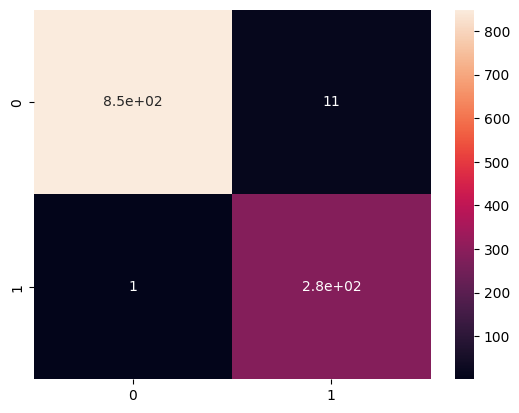

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       860
           1       0.96      1.00      0.98       286

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix                                               
spam_df = pd.read_csv('spam.csv')
X_train, X_test, y_train, y_test = train_test_split(spam_df['text'], spam_df['spam'], test_size=0.2)
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
clf = MultinomialNB().fit(X_train_vectorized, y_train)
y_pred = clf.predict(X_test_vectorized)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()
print(classification_report(y_test, y_pred))